<a href="https://colab.research.google.com/github/Hamza-Chekireb/Artificial-Intelligence-Data-Science-Data-Analysis-Portfolio/blob/main/Classifications_CNN_And_Transfert_Learning_Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**--Atelier 16 septembre 2022**

**--Les CNNs**

In [ ]:
# Importation des donnés 

from keras.datasets.mnist import load_data
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
# Retourne des tuples de données sous forme de (images, labels)
# le premier tuple est pour les données d’entraînement et le deuxième est pour les données de test
(train_digits, train_labels), (test_digits, test_labels) = load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_digits.shape

(60000, 28, 28)

**2. Preprocessing**

On a 60000 milles images de dimension 28*28

In [ ]:
# Redimensionement des images
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1  # Une image niveau de gris
train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))


In [ ]:
train_data.shape

(60000, 28, 28, 1)

In [ ]:
# Normalisation de la taille des images [0,1]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

In [ ]:
# Transformation des dimensions des labels
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)

In [ ]:
train_labels_cat.shape

(60000, 10)

**3. Construction du modèle**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential()
    # Les couches conventionnelles
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',strides=1,
                     input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))   

    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()


In [ ]:
import time
d = time.time()
history = model.fit(train_data, train_labels_cat, 
                    epochs=15, batch_size=64,
                    validation_split=0.2)
f = time.time()
print('La durée sans GPU' +str(f-d))

Epoch 1/15
750/750 [==============================] - 15s 5ms/step - loss: 0.1931 - accuracy: 0.9386 - val_loss: 0.0700 - val_accuracy: 0.9788
Epoch 2/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0551 - accuracy: 0.9829 - val_loss: 0.0473 - val_accuracy: 0.9849
Epoch 3/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0509 - val_accuracy: 0.9858
Epoch 4/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.0365 - val_accuracy: 0.9893
Epoch 5/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0352 - val_accuracy: 0.9896
Epoch 6/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0197 - accuracy: 0.9934 - val_loss: 0.0429 - val_accuracy: 0.9868
Epoch 7/15
750/750 [==============================] - 3s 5ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0417 - val_accuracy: 0.9886
Epoch

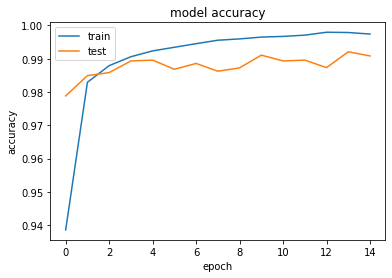

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Transfert learning_VGG16**

**Cats and Dogs classifications**

In [ ]:
import tensorflow as tf
# URL de téléchargement de la base de données cat and dogs
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Créer un dossier et faire l’extraction du fichier zipé là dedans
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip' , origin=url , extract=True)

68616192/68606236 [==============================] - 0s 0us/step


In [ ]:
# Pour faire une manipulation des fichier il faut utiliser la bibliothèque os

import os # operating system

#  Join pour acceder au fichier zip | os.path.dirname(zip_dir): nom du fichier zipé
#  Mettre les fichiers dans un dossier
train_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered/train')
val_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered/validation')

In [ ]:
# Extraire les images à partir d'un dossier

# Comme les images n'ont pas toutes la même taille, il faut donc effectuer une normalisation

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(150,150),batch_size=32)# Normaliser la taille de l'image 

val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,image_size=(150,150),batch_size=32)# Normaliser la taille de l'image

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


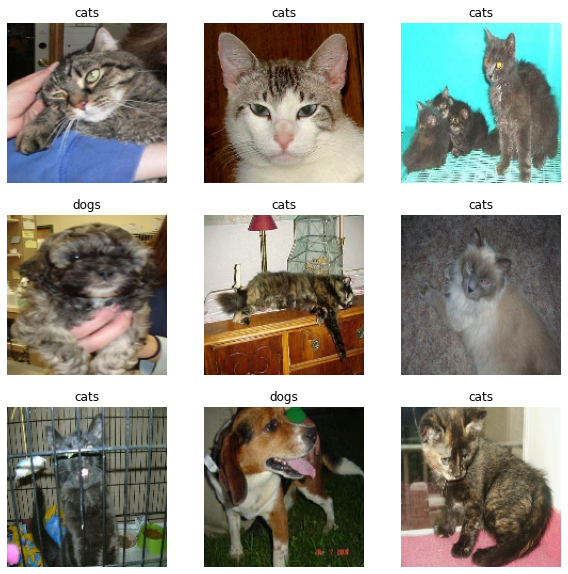

In [ ]:
class_names = train_data.class_names

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for  image , label in train_data:
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow (image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis(False)#Supprimer les axes

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D, BatchNormalization,Dropout,Rescaling

model = Sequential()

model.add(Rescaling(1/255))
model.add(Conv2D(64 , (5,5) , padding='same' , activation='relu' ))
model.add(Conv2D(32 , (5,5) , padding='same' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2))
model.add(Dropout(0.2))


model.add(Conv2D(64 , (5,5) , padding='same' , activation='relu'))
model.add(Conv2D(32 , (5,5) , padding='same' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam' , loss= tf.keras.losses.BinaryCrossentropy() , metrics=['accuracy'])
'''train_data = train_data.cache()
val_data = val_data.cache()'''
history = model.fit(train_data , epochs=10 , validation_data=val_data)

Epoch 1/10
63/63 [==============================] - 28s 149ms/step - loss: 3.6500 - accuracy: 0.5185 - val_loss: 1.4203 - val_accuracy: 0.5360
Epoch 2/10
63/63 [==============================] - 7s 111ms/step - loss: 1.1799 - accuracy: 0.5535 - val_loss: 1.2544 - val_accuracy: 0.5310
Epoch 3/10
63/63 [==============================] - 7s 111ms/step - loss: 0.7257 - accuracy: 0.6140 - val_loss: 1.2070 - val_accuracy: 0.5330
Epoch 4/10
63/63 [==============================] - 7s 111ms/step - loss: 0.5362 - accuracy: 0.7360 - val_loss: 0.8855 - val_accuracy: 0.5410
Epoch 5/10
63/63 [==============================] - 7s 111ms/step - loss: 0.4341 - accuracy: 0.8070 - val_loss: 0.9896 - val_accuracy: 0.5750
Epoch 6/10
63/63 [==============================] - 7s 113ms/step - loss: 0.3049 - accuracy: 0.8680 - val_loss: 1.0463 - val_accuracy: 0.5880
Epoch 7/10
63/63 [==============================] - 7s 111ms/step - loss: 0.2260 - accuracy: 0.9080 - val_loss: 1.0596 - val_accuracy: 0.6180
Epoch

**Accuracy du modèle**

In [ ]:
model.evaluate(val_data)

32/32 [==============================] - 1s 34ms/step - loss: 1.2419 - accuracy: 0.6140


[1.2419252395629883, 0.6140000224113464]

L'accuracy est mauvaise pour pallier ce problème nous proposons de faire une Data Augmentation

**Data Augmentation**

In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Créer un bloc de coches séquentielles pour faire des augmentations de données avant de faire l’entraînement

data_aug = Sequential()
data_aug.add(RandomFlip( 'horizontal_and_vertical', input_shape = (150,150,3)))# Changer la position sans changer la rotation
data_aug.add(RandomRotation(0.2)) # modifier 20% des images
data_aug.add(RandomZoom(0.2)) # modifier 20% des images

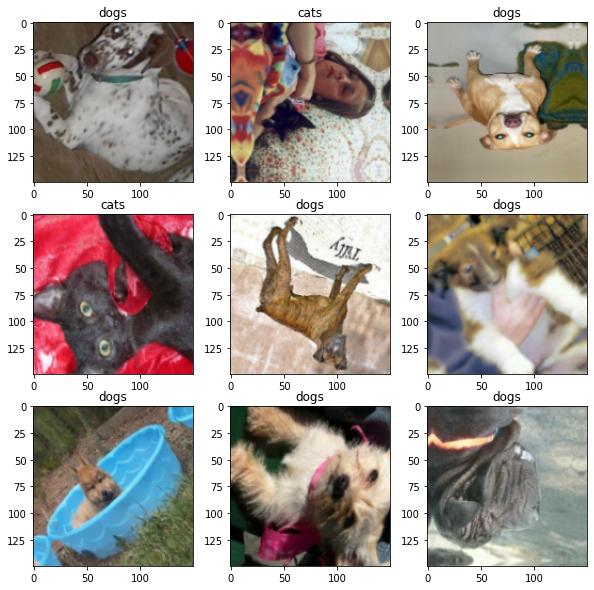

In [ ]:
# Visualisation des images après la Data augmentation
class_names = train_data.class_names

plt.figure(figsize=(10,10))

for  image , label in train_data.take(1):
  for i in range(9):
    augmented_images = data_aug(image)
    ax = plt.subplot(3,3,i+1)
    plt.imshow (augmented_images[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])

In [ ]:
model = Sequential()

model.add(data_aug) # Couches séquentielles 
model.add(Rescaling(1/255))


model.add(Conv2D(64 , (5,5) , padding='same' , activation='relu' ))
model.add(Conv2D(32 , (5,5) , padding='same' , activation='relu'))
model.add(BatchNormalization()) # Couche de normalisation pour éviter l'overfiting et améliorer la vitesse de calcul
model.add(MaxPooling2D((2,2) , strides = 2))
model.add(Dropout(0.2))


model.add(Conv2D(64 , (5,5) , padding='same' , activation='relu'))
model.add(Conv2D(32 , (5,5) , padding='same' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

**Visualisation du modèle**

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer='adam' , loss= tf.keras.losses.BinaryCrossentropy() , metrics=['accuracy'])
'''train_ds = train_data.cache()
val_ds = val_data.cache()'''
history = model.fit(train_data , epochs=30 , validation_data=val_data)

Epoch 1/10
63/63 [==============================] - 11s 136ms/step - loss: 0.6450 - accuracy: 0.6465 - val_loss: 0.7438 - val_accuracy: 0.5770
Epoch 2/10
63/63 [==============================] - 7s 114ms/step - loss: 0.6146 - accuracy: 0.6585 - val_loss: 0.8127 - val_accuracy: 0.5870
Epoch 3/10
63/63 [==============================] - 7s 114ms/step - loss: 0.6247 - accuracy: 0.6575 - val_loss: 0.7051 - val_accuracy: 0.5960
Epoch 4/10
63/63 [==============================] - 7s 114ms/step - loss: 0.6207 - accuracy: 0.6650 - val_loss: 5.6542 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 7s 115ms/step - loss: 0.5888 - accuracy: 0.6890 - val_loss: 0.7698 - val_accuracy: 0.5740
Epoch 6/10
63/63 [==============================] - 7s 115ms/step - loss: 0.6051 - accuracy: 0.6865 - val_loss: 1.0543 - val_accuracy: 0.5540
Epoch 7/10
63/63 [==============================] - 7s 115ms/step - loss: 0.5880 - accuracy: 0.6860 - val_loss: 0.5882 - val_accuracy: 0.6970
Epoch

**Accuracy du modèle**

In [ ]:
model.evaluate(val_data)

32/32 [==============================] - 2s 55ms/step - loss: 0.6671 - accuracy: 0.6360


[0.6671157479286194, 0.6359999775886536]


**--Transfert Learning**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

**Précision de la classification des images par rapport à la taille du modèle/au nombre d'opérations.**

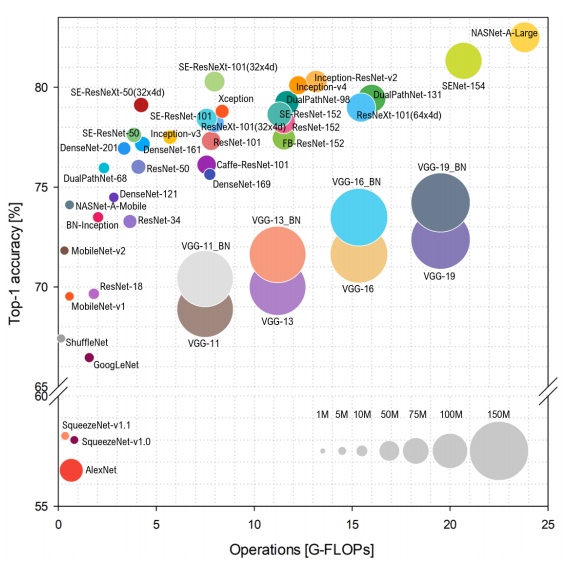

**Visualisation du VGG16**

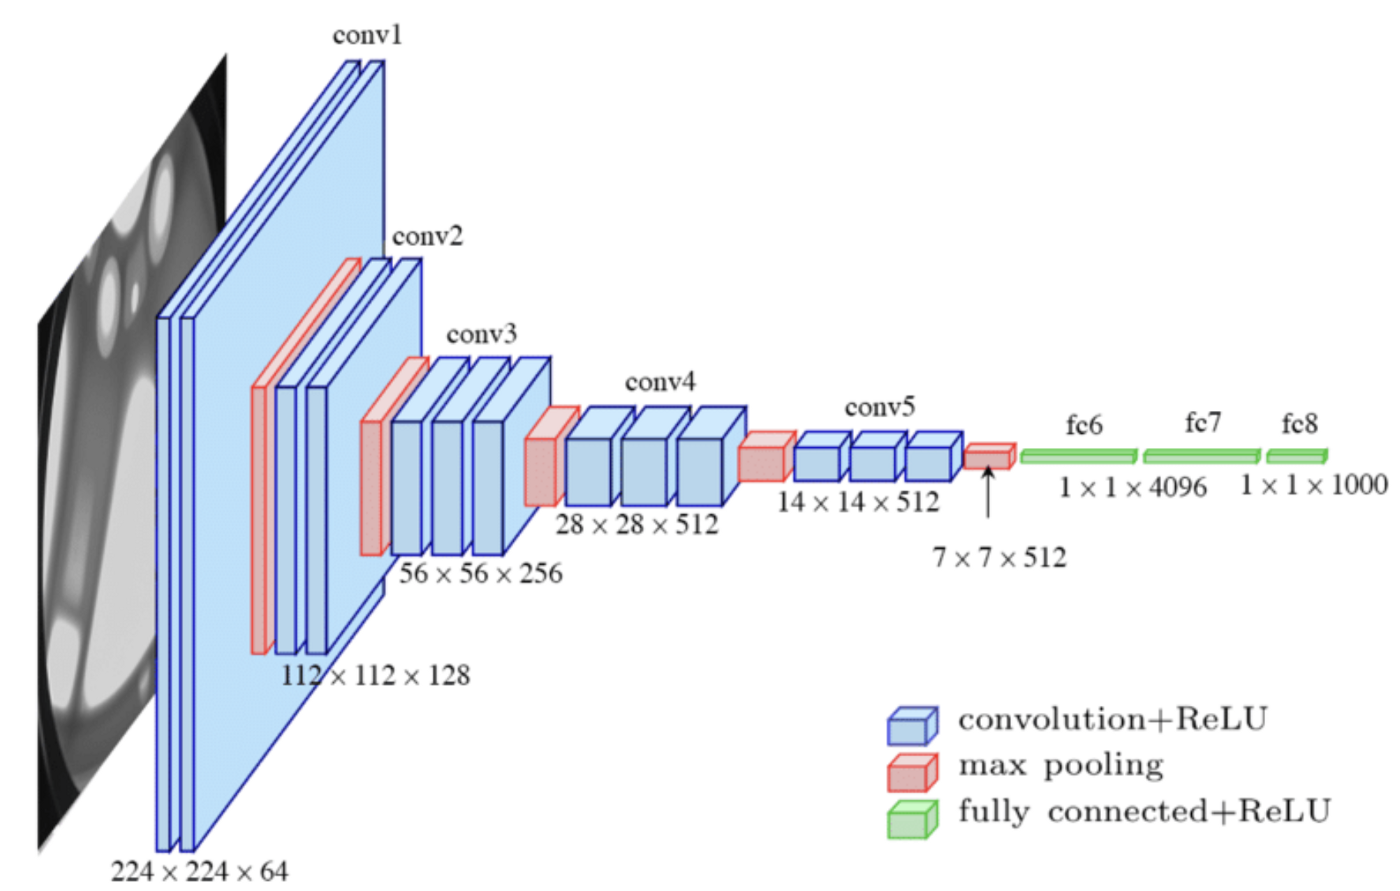

In [ ]:
#include_top : inclure la partie clssification(3 chouches entièrement connectées), False veut dire qu'on va rajouter notre block classification
#weights: si 'non', initialisation aléatoire, si 'imagenet' initialisation avec les paramètres obtenu en entraînant le modèle avec la base de données imagenet
#pooling: Choisir le type de pooling max, avg
#classes: Le nombre de classes du modèle(shape de la dernière chouche), utilisé seulement si include_top=True
#classifier_activation: La fonction d'activation de la dernière couche
vgg16 = VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classes=2,
    classifier_activation='softmax'
)



In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#Afficher la dernière couche(Output layer)
vgg16.output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'predictions')>

In [ ]:
vgg16.trainable=False

In [ ]:
#Accéder aux couches du modèle
vgg16.layers[3:5]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, InputLayer
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_data , epochs=5 , validation_data=val_data)

Epoch 1/5
63/63 [==============================] - 9s 132ms/step - loss: 0.6949 - accuracy: 0.5225 - val_loss: 0.7013 - val_accuracy: 0.5000
Epoch 2/5
63/63 [==============================] - 8s 129ms/step - loss: 0.6944 - accuracy: 0.5180 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 3/5
63/63 [==============================] - 8s 131ms/step - loss: 0.6917 - accuracy: 0.5225 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 4/5
63/63 [==============================] - 8s 131ms/step - loss: 0.6921 - accuracy: 0.5360 - val_loss: 0.6855 - val_accuracy: 0.5680
Epoch 5/5
63/63 [==============================] - 9s 132ms/step - loss: 0.6907 - accuracy: 0.5360 - val_loss: 0.6842 - val_accuracy: 0.5650


In [ ]:
model.evaluate(val_data)

32/32 [==============================] - 3s 81ms/step - loss: 1.5691 - accuracy: 0.9460


[1.569111704826355, 0.9459999799728394]